# <div style="background:rgba(226, 72, 25, 0.64); padding:18px; border-radius:12px; font-size:0.9em; margin-bottom:16px; color:#fff; font-weight:bold; width: max-content;"> 13 Visualizing time series and other functions of an independent variable
</div>

**Basado en el libro "Fundamentals of Data Visualization" de Claus O. Wilke**

Visualizar datos a lo largo del tiempo es, en esencia, el arte de contar historias. Una simple línea en un gráfico puede narrar el auge y la caída de un imperio económico, el pulso cambiante del clima o, como en nuestro caso de estudio, la fluctuación de las ventas en el Reino Unido. Cada punto de datos es un evento, y la línea que los conecta es la trama.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_path = '../../../datasets/alumnos/SomoSiete/E-CommerceAnalysusUK.csv'
# Carga del dataset
df = pd.read_csv(file_path, encoding='ISO-8859-1')
# Visualización de las primeras filas para confirmar la carga
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 1. Visualizando Series de Tiempo Individuales

Es el punto de partida más común: una sola variable que cambia a lo largo del tiempo.

### ¿Cuándo usarlo?

Usa esta técnica cuando tienes una única métrica y tu objetivo es mostrar su **evolución**. Quieres responder preguntas como:
- ¿Cómo ha cambiado el precio de un producto a lo largo de los años?
- ¿Cuál es la tendencia general de las visitas a un sitio web?
- ¿Existe algún patrón estacional en los datos de temperatura?

### ¿Cómo visualizarlo correctamente?

La forma canónica y más efectiva es un **gráfico de líneas** (*line graph*).

-   **Do's (Qué SÍ hacer):**
    -   **Conectar los puntos:** A diferencia de un simple gráfico de dispersión, la línea que conecta los puntos en orden cronológico es lo que cuenta la historia. Muestra la progresión y la conexión entre cada medición.
    -   **Ejes claros:** El tiempo siempre debe ir en el eje X (la variable independiente) y la métrica que estás midiendo en el eje Y (la variable dependiente).
    -   **Etiquetas informativas:** Asegúrate de que el gráfico tenga un título descriptivo y que los ejes indiquen claramente qué representan y en qué unidades se miden (por ejemplo, "Precio (USD)", "Fecha").

-   **Don'ts (Qué NO hacer):**
    -   **No dejar los puntos aislados:** Un gráfico de dispersión por sí solo no logra mostrar la naturaleza secuencial de los datos. La conexión es clave.



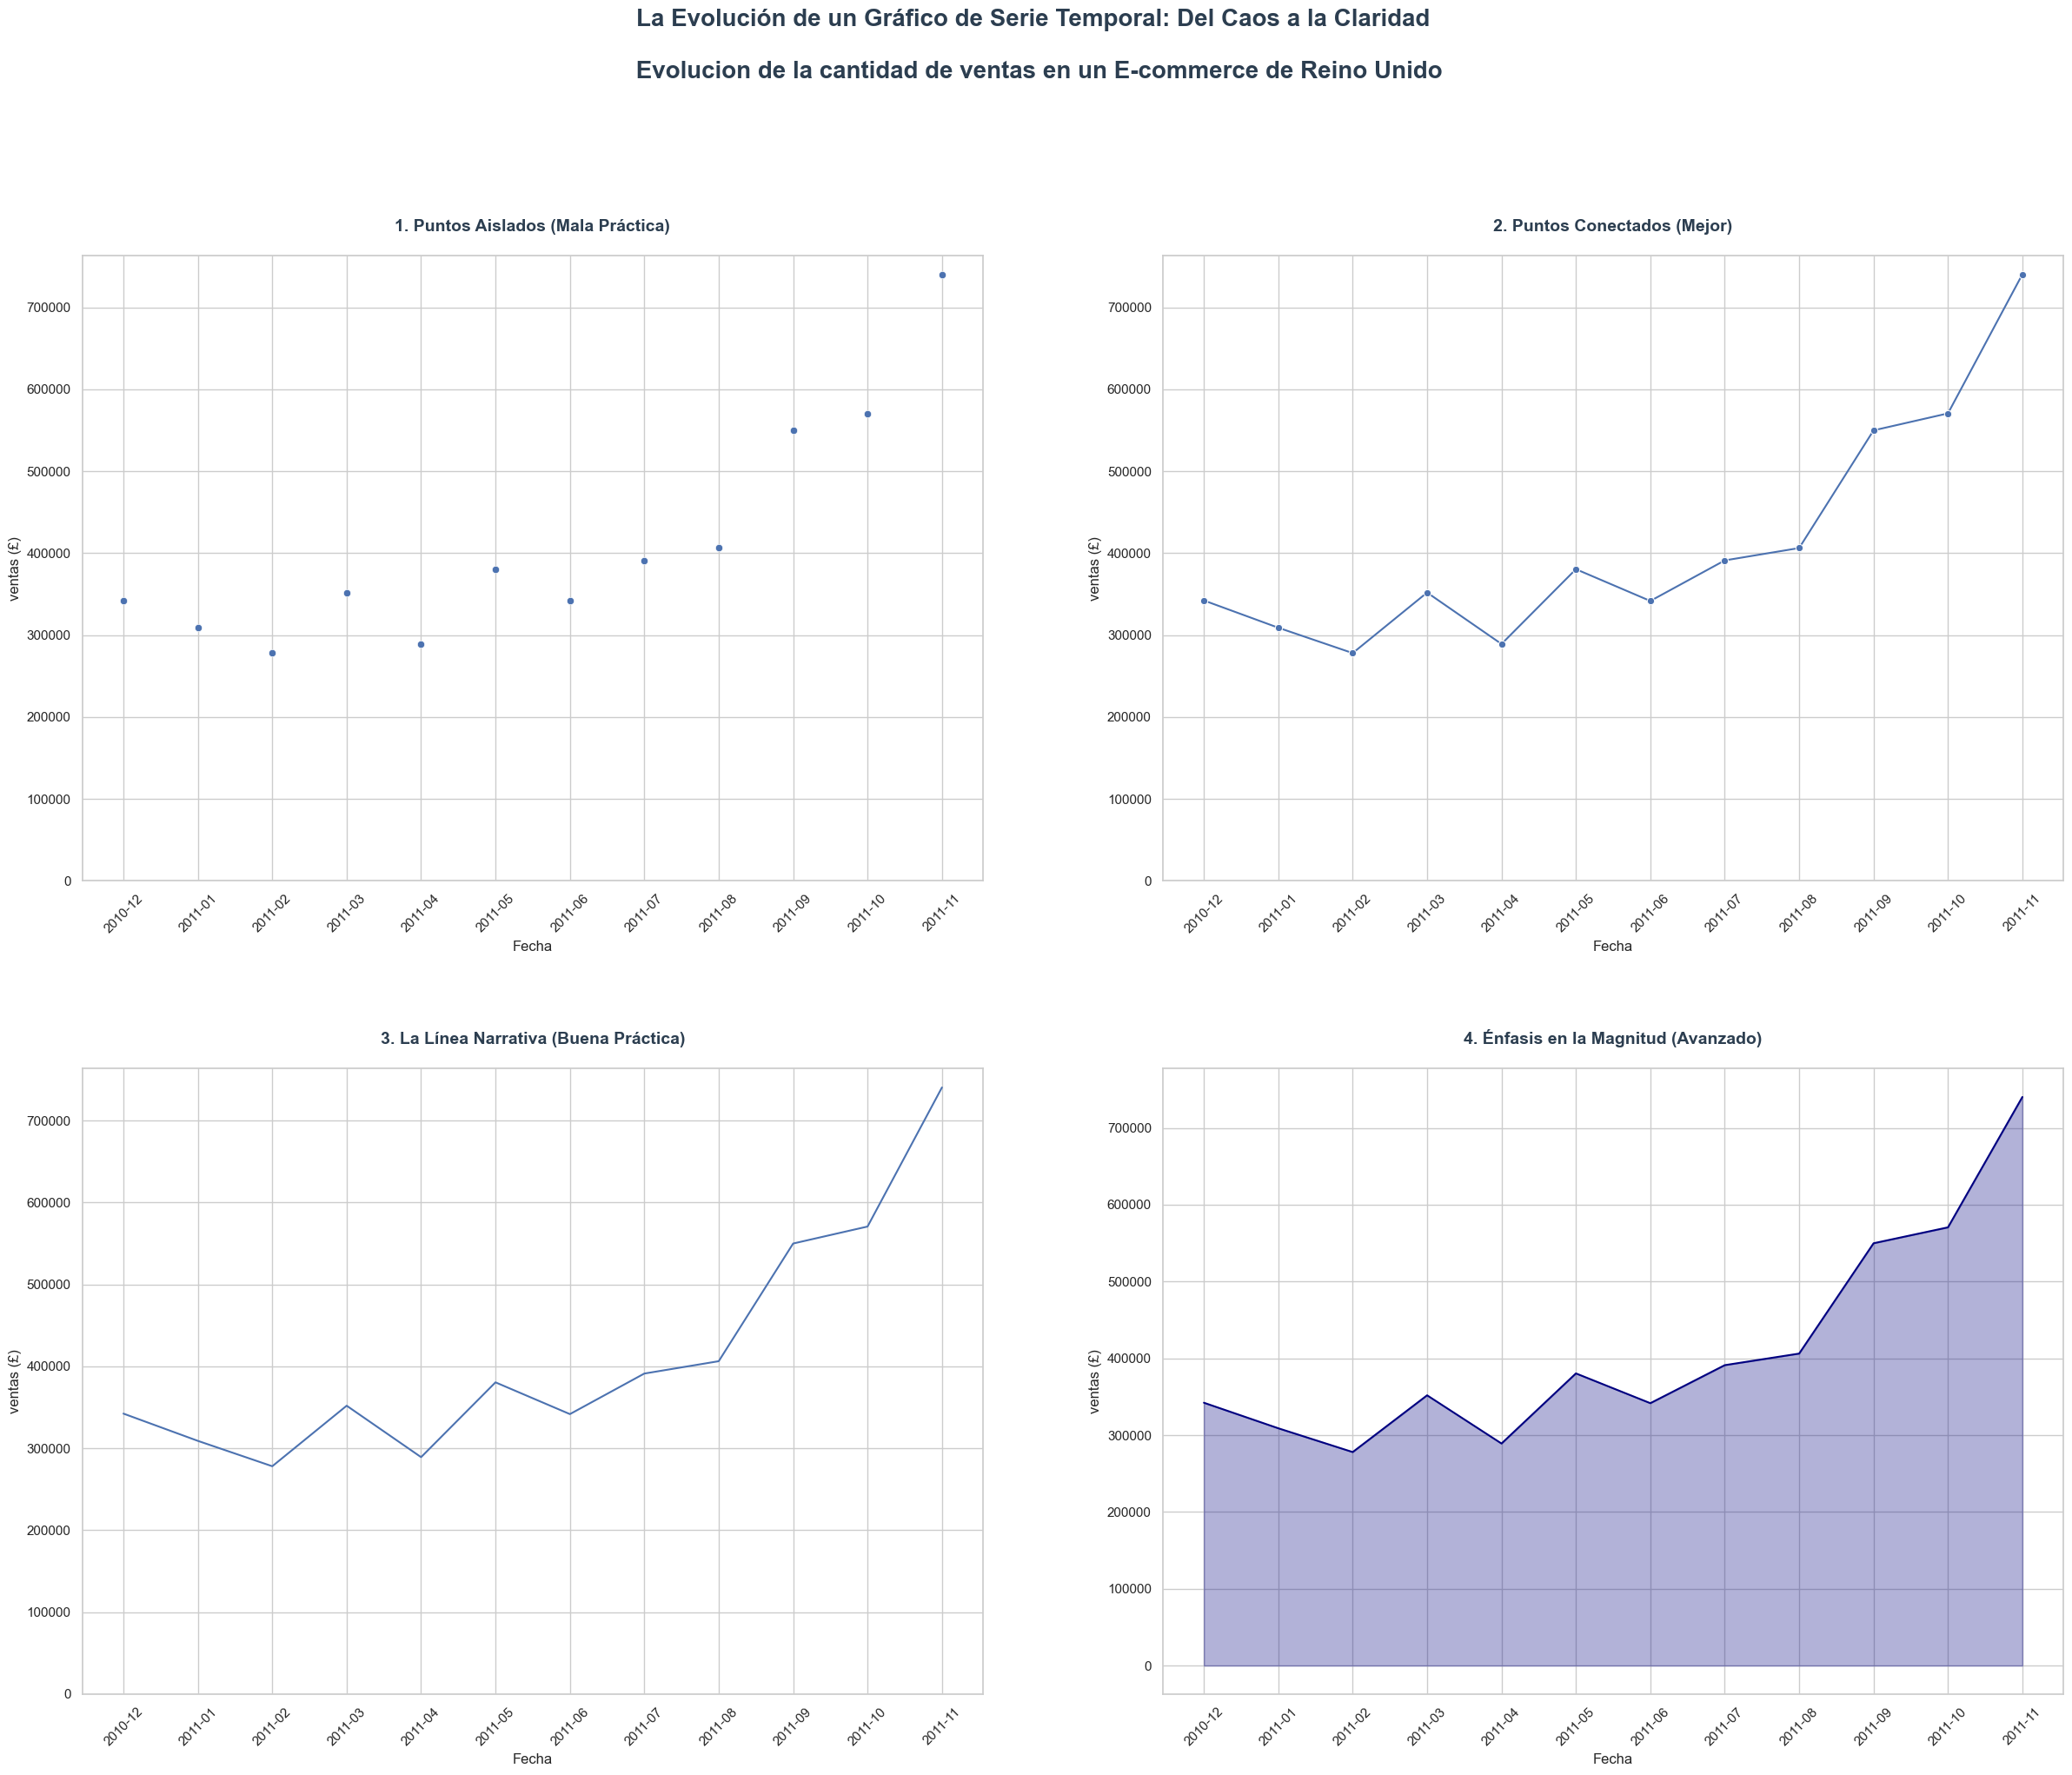

In [8]:
# -------------------------------------------------------------------
# PASO 1: Preparación del DataFrame 
# -------------------------------------------------------------------
# Convertir la columna de fecha a tipo datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# ------------------------
# 2. Agregar precios por mes 
# ------------------------
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")
monthly_prices = df.groupby("YearMonth")["Quantity"].sum().reset_index()

# Convertimos a timestamp y eliminamos el último mes (siguiendo el patrón)
monthly_prices["YearMonth"] = monthly_prices["YearMonth"].dt.to_timestamp()
monthly_prices = monthly_prices.iloc[:-1]

# Crear columna de etiquetas para el eje x (YYYY-MM)
monthly_prices["MonthLabel"] = monthly_prices["YearMonth"].dt.strftime("%Y-%m")

# -------------------------------------------------------------------
# PASO 2: Código de Visualización 
# -------------------------------------------------------------------

# --- Preparación de la figura ---
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(24, 20))
fig.suptitle('La Evolución de un Gráfico de Serie Temporal: Del Caos a la Claridad \n\n Evolucion de la cantidad de ventas en un E-commerce de Reino Unido', 
             fontsize=20, fontweight='bold', y=1.02, color='#2c3e50')

# --- Gráfico 1: El Punto de Partida (Scatter Plot) ---
sns.scatterplot(data=monthly_prices, x="MonthLabel", y="Quantity", ax=axes[0,0])
axes[0,0].set_title('1. Puntos Aislados (Mala Práctica)',
                   fontsize=14, fontweight='bold', pad=20, color='#2c3e50')
axes[0,0].set_xlabel('Fecha')
axes[0,0].set_ylabel('ventas (£)')
axes[0,0].set_ylim(bottom=0)
axes[0,0].tick_params(axis='x', rotation=45)

# --- Gráfico 2: La Primera Conexión (Línea con Puntos) ---
sns.lineplot(data=monthly_prices, x="MonthLabel", y="Quantity", marker='o', ax=axes[0,1])
axes[0,1].set_title('2. Puntos Conectados (Mejor)',
                   fontsize=14, fontweight='bold', pad=20, color='#2c3e50')
axes[0,1].set_xlabel('Fecha')
axes[0,1].set_ylabel('ventas (£)')
axes[0,1].set_ylim(bottom=0)
axes[0,1].tick_params(axis='x', rotation=45)

# --- Gráfico 3: La Forma Correcta (Línea Limpia) ---
sns.lineplot(data=monthly_prices, x="MonthLabel", y="Quantity", ax=axes[1,0])
axes[1,0].set_title('3. La Línea Narrativa (Buena Práctica)',
                   fontsize=14, fontweight='bold', pad=20, color='#2c3e50')
axes[1,0].set_xlabel('Fecha')
axes[1,0].set_ylabel('ventas (£)')
axes[1,0].set_ylim(bottom=0)
axes[1,0].tick_params(axis='x', rotation=45)

# --- Gráfico 4: Énfasis en la Magnitud (Gráfico de Área) ---
sns.lineplot(data=monthly_prices, x="MonthLabel", y="Quantity", ax=axes[1,1], color='navy')
axes[1,1].fill_between(monthly_prices["MonthLabel"], monthly_prices["Quantity"], alpha=0.3, color='navy')
axes[1,1].set_title('4. Énfasis en la Magnitud (Avanzado)',
                   fontsize=14, fontweight='bold', pad=20, color='#2c3e50')
axes[1,1].set_xlabel('Fecha')
axes[1,1].set_ylabel('ventas (£)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

---

## 2. Visualizando Múltiples Series de Tiempo y Curvas Dosis-Respuesta

Aquí el desafío es la **comparación** entre dos o más series. El concepto de "curva dosis-respuesta" es una generalización: se aplica a cualquier conjunto de datos donde una variable independiente ordenada (no necesariamente el tiempo) afecta a una variable de respuesta.

### ¿Cuándo usarlo?

Cuando necesitas comparar la evolución de varias series de tiempo a la vez. El objetivo es responder preguntas como:
- ¿Qué producto se vendió más a lo largo del año?
- ¿Cómo se compara el rendimiento de dos acciones diferentes?
- ¿El patrón de crecimiento de este año es similar al del año pasado?

### ¿Cómo visualizarlo correctamente?

Tienes dos opciones principales, dependiendo de la naturaleza de tus datos:

#### Opción A: Superponer las líneas en el mismo gráfico
-   **Do's (Qué SÍ hacer):**
    -   **Ideal para comparación directa:** Es la mejor opción cuando las series comparten una escala similar y no son demasiadas (2 a 5 líneas suele ser manejable).
    -   **Usa la estética para diferenciar:** Utiliza colores distintos y/o diferentes tipos de línea (sólida, punteada) para cada serie.
    -   **Incluye una leyenda clara:** La leyenda es esencial para que el espectador pueda identificar a qué serie corresponde cada línea.

-   **Don'ts (Qué NO hacer):**
    -   **Evítalo si las escalas son muy diferentes:** Si una serie se mueve entre 0-10 y otra entre 0-1000, la primera aparecerá como una línea plana y la comparación será imposible.
    -   **No satures el gráfico:** Si tienes demasiadas series, el gráfico se convertirá en un "plato de espaguetis" ilegible.

#### Opción B: Gráficos Pequeños Múltiples (*Small Multiples* o *Faceting*)
-   **Do's (Qué SÍ hacer):**
    -   **La mejor opción para escalas diferentes o muchas series:** Cada serie temporal se muestra en su propio gráfico.
    -   **Mantén los ejes consistentes:** Todos los mini-gráficos deben compartir el mismo rango en el eje de tiempo (X) para permitir una comparación justa de los patrones. Si es posible, mantén también la misma escala en el eje Y.
    -   **Organización lógica:** Ordena los gráficos de una manera que tenga sentido para facilitar la comparación.


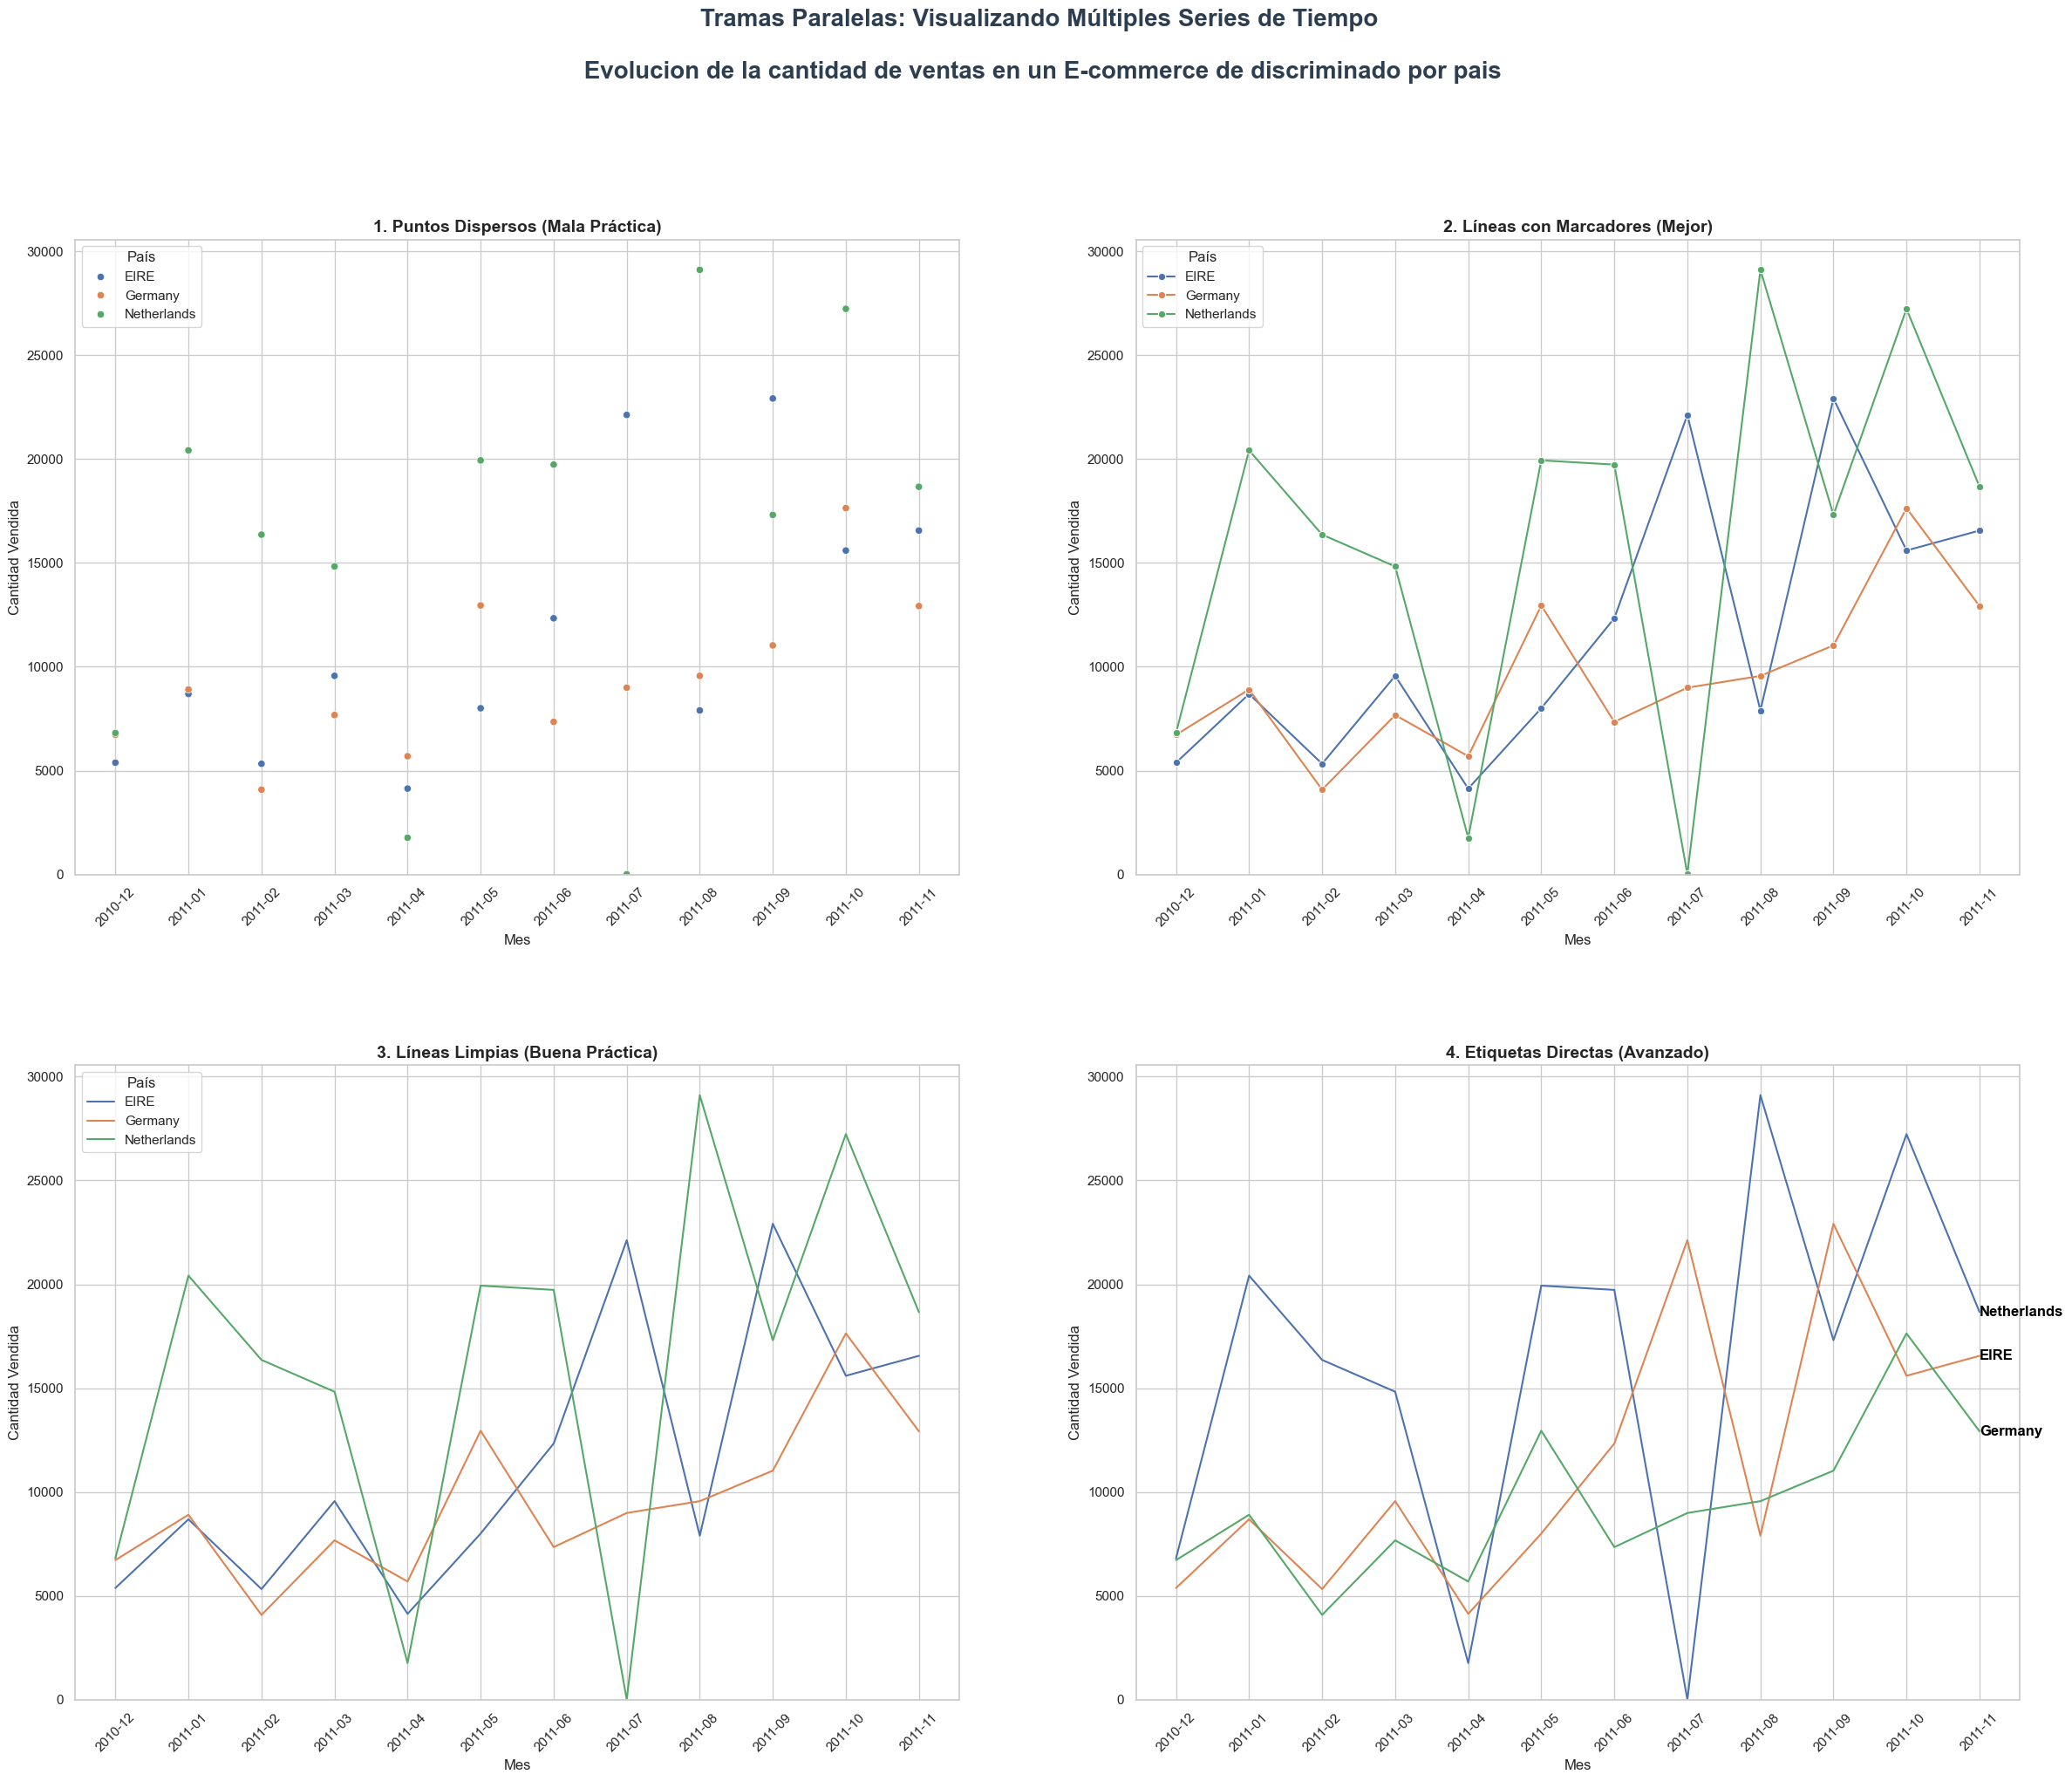

In [3]:
# -------------------------------------------------------------------
# PASO 1: Preparación del DataFrame (Usando exactamente el código de viz_ejemplo)
# -------------------------------------------------------------------
# Convertir la columna de fecha a tipo datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# ------------------------
# 2. Agregaciones por país y mes (código exacto de viz_ejemplo)
# ------------------------
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")
monthly_country = df.groupby(["Country", "YearMonth"])["Quantity"].sum().reset_index()
monthly_country["YearMonth"] = monthly_country["YearMonth"].dt.to_timestamp()

# Eliminar último mes (incompleto)
monthly_country = monthly_country[monthly_country["YearMonth"] < monthly_country["YearMonth"].max()]

# Top 4 países y nos quedamos con 2,3,4
top_4 = monthly_country.groupby("Country")["Quantity"].sum().nlargest(4).index
selected_countries = top_4[1:4]
filtered = monthly_country[monthly_country["Country"].isin(selected_countries)].copy()

# Crear columna de etiquetas para el eje x
filtered["MonthLabel"] = filtered["YearMonth"].dt.strftime("%Y-%m")

# -------------------------------------------------------------------
# PASO 2: Código de Visualización en Grid 2x2
# -------------------------------------------------------------------

# --- Preparación de la figura ---
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(24, 20))
fig.suptitle('Tramas Paralelas: Visualizando Múltiples Series de Tiempo\n\n Evolucion de la cantidad de ventas en un E-commerce de discriminado por pais', 
             fontsize=20, fontweight='bold', y=1.02, color='#2c3e50')

# --- Gráfico 1: Puntos Dispersos ---
sns.scatterplot(data=filtered, x="MonthLabel", y="Quantity", hue="Country", ax=axes[0,0])
axes[0,0].set_title("1. Puntos Dispersos (Mala Práctica)", fontsize=14, fontweight='bold')
axes[0,0].set_xlabel("Mes")
axes[0,0].set_ylabel("Cantidad Vendida")
axes[0,0].set_ylim(bottom=0)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title="País")

# --- Gráfico 2: Líneas con Marcadores ---
sns.lineplot(data=filtered, x="MonthLabel", y="Quantity", hue="Country", marker="o", ax=axes[0,1])
axes[0,1].set_title("2. Líneas con Marcadores (Mejor)", fontsize=14, fontweight='bold')
axes[0,1].set_xlabel("Mes")
axes[0,1].set_ylabel("Cantidad Vendida")
axes[0,1].set_ylim(bottom=0)
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title="País")

# --- Gráfico 3: Líneas Limpias ---
sns.lineplot(data=filtered, x="MonthLabel", y="Quantity", hue="Country", ax=axes[1,0])
axes[1,0].set_title("3. Líneas Limpias (Buena Práctica)", fontsize=14, fontweight='bold')
axes[1,0].set_xlabel("Mes")
axes[1,0].set_ylabel("Cantidad Vendida")
axes[1,0].set_ylim(bottom=0)
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title="País")

# --- Gráfico 4: Etiquetas Directas (Código exacto de viz_ejemplo) ---
for country in selected_countries:
    data_c = filtered[filtered["Country"] == country]
    axes[1,1].plot(data_c["MonthLabel"], data_c["Quantity"], label=country)

# Etiquetas al final de cada línea
for country in selected_countries:
    data_c = filtered[filtered["Country"] == country]
    axes[1,1].text(
        data_c["MonthLabel"].iloc[-1],
        data_c["Quantity"].iloc[-1],
        country,
        va="center",
        fontsize=12,
        fontweight="bold",
        color="black"
    )

axes[1,1].set_title("4. Etiquetas Directas (Avanzado)", fontsize=14, fontweight='bold')
axes[1,1].set_xlabel("Mes")
axes[1,1].set_ylabel("Cantidad Vendida")
axes[1,1].set_ylim(bottom=0)
axes[1,1].tick_params(axis='x', rotation=45)

# Ajustamos el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

---

## 3. Visualizando Dos o Más Variables de Respuesta en el Tiempo

Este es el caso más avanzado. El objetivo no es solo comparar las tendencias de dos variables, sino entender la **relación** entre ellas a medida que el tiempo avanza.

### ¿Cuándo usarlo?

Cuando quieres explorar la interacción dinámica entre dos métricas. Quieres responder preguntas como:
- ¿Existe una correlación entre la tasa de desempleo y el precio de la vivienda? ¿Esa correlación cambia con el tiempo?
- ¿Cómo se relaciona el gasto en marketing con los ingresos generados? ¿Hay un desfase temporal?
- ¿Siguen un patrón cíclico la inflación y el precio de ciertos productos?.

### ¿Cómo visualizarlo correctamente?

Nuevamente, hay dos enfoques principales con diferentes fortalezas.

#### Opción A: Dos Gráficos de Líneas Separados
-   **Ventaja:** Son muy fáciles de leer. Cada variable se puede interpretar de forma independiente sin dificultad.
-   **Desventaja:** Es muy difícil ver la **relación** entre las variables. El espectador tiene que saltar mentalmente de un gráfico a otro para intentar conectar los patrones, lo cual es poco efectivo para descubrir relaciones complejas o cíclicas.

#### Opción B: El Gráfico de Dispersión Conectado (*Connected Scatter Plot*)
Esta es la técnica más potente y la que el capítulo destaca.

-   **¿Qué es?** En lugar de tener el tiempo en el eje X, se coloca una variable en el eje X y la otra en el eje Y. Luego, los puntos (que representan un momento en el tiempo) se conectan en orden cronológico.

-   **Do's (Qué SÍ hacer):**
    -   **Revela relaciones complejas:** Es excelente para mostrar ciclos, espirales y cambios en la correlación. Una línea que va de abajo-izquierda a arriba-derecha indica correlación positiva; una que va de arriba-izquierda a abajo-derecha indica correlación negativa.
    -   **¡INDICA LA DIRECCIÓN DEL TIEMPO!** Esta es la regla de oro y el punto más importante. Sin una guía visual que muestre el flujo del tiempo, el gráfico es un garabato sin sentido.
        -   **Cómo hacerlo:** Usa un **gradiente de color** (por ejemplo, los puntos más antiguos en un color claro y los más recientes en uno oscuro), **flechas** a lo largo de la trayectoria, o **etiquetas de fecha** en puntos clave.

-   **Don'ts (Qué NO hacer):**
    -   **Nunca lo muestres sin una guía temporal:** Como el autor demuestra con un ejemplo "malo", omitir los indicadores de tiempo hace que el gráfico sea completamente ininterpretable.
    -   **No asumas que es para todos:** Puede ser menos intuitivo para una audiencia no familiarizada con él. Si la claridad sobre los valores individuales es más importante que la relación, los gráficos separados pueden ser una mejor opción.

-   **Uso avanzado:** Para más de dos variables, se puede combinar esta técnica con métodos de reducción de dimensionalidad (como PCA) para visualizar la "trayectoria" de un sistema complejo a través del tiempo.

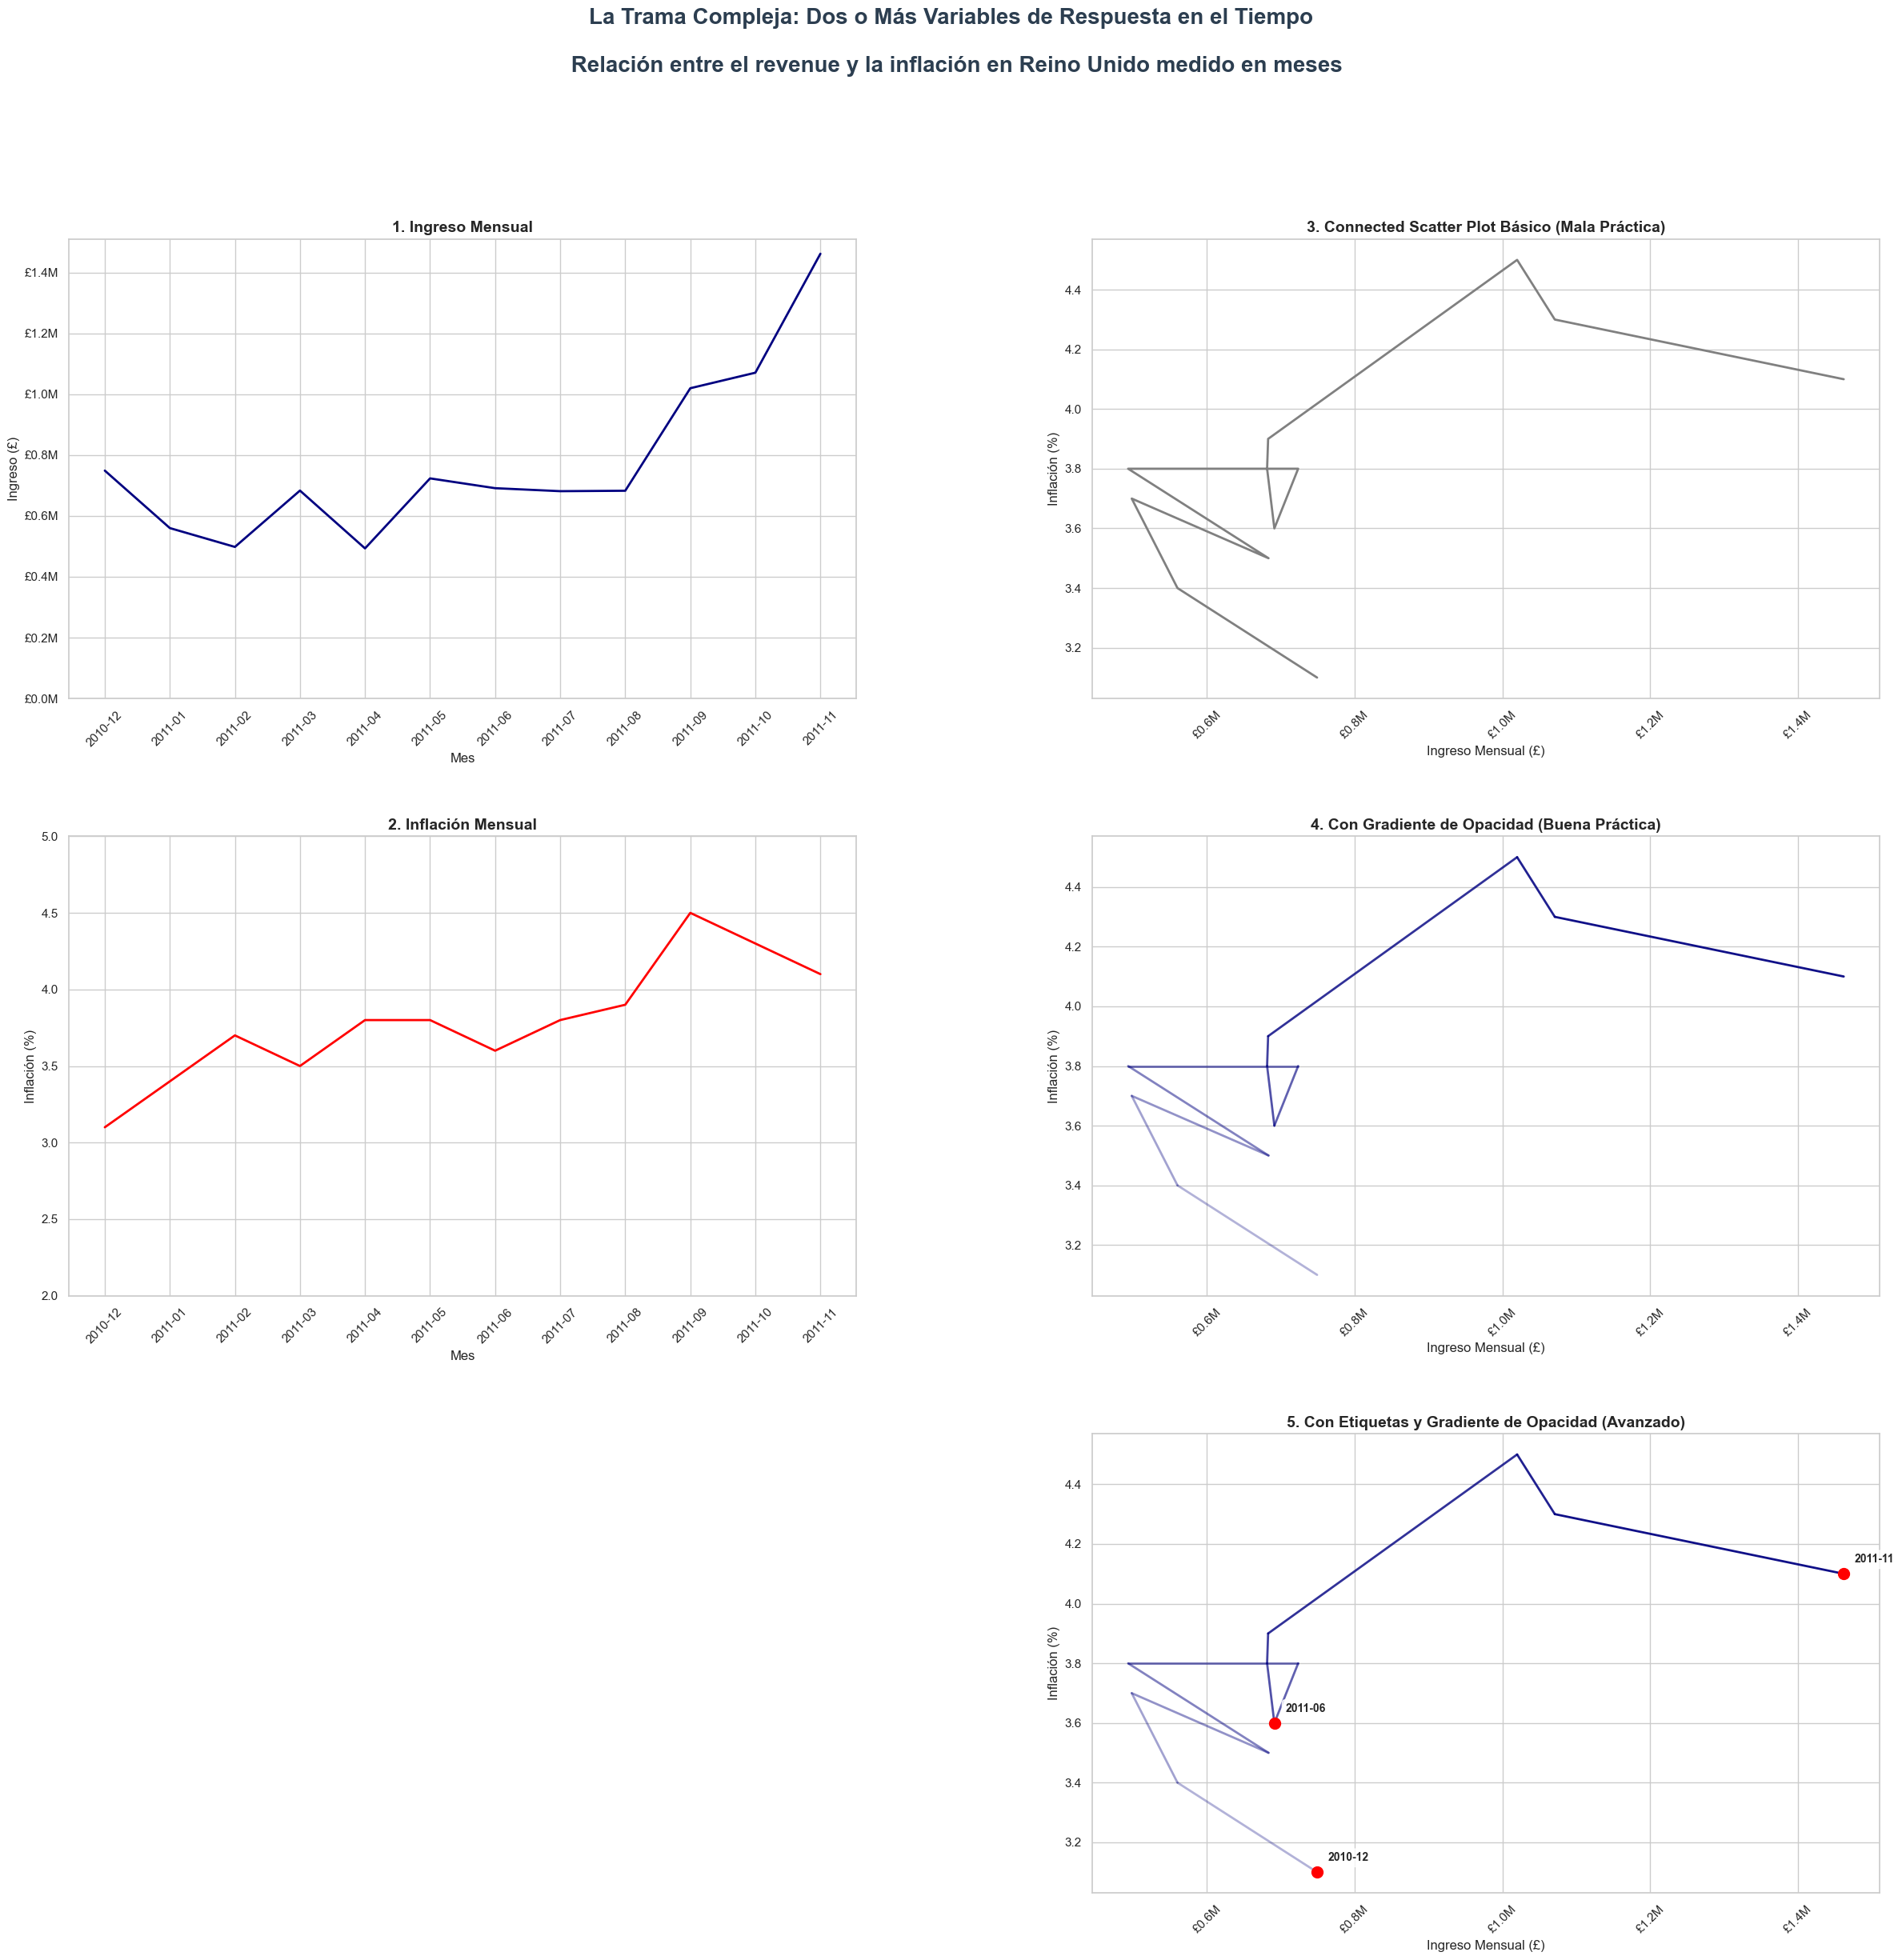

In [9]:
inflation_df = pd.read_csv('../../../datasets/alumnos/SomoSiete/MonthlyInflationRateUK.csv')

# Preparar datos de revenue mensual (del dataset original)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")
df["Revenue"] = df["Quantity"] * df["UnitPrice"] 
monthly_revenue = df.groupby("YearMonth")["Revenue"].sum().reset_index()
monthly_revenue["YearMonth"] = monthly_revenue["YearMonth"].dt.to_timestamp()
monthly_revenue["MonthLabel"] = monthly_revenue["YearMonth"].dt.strftime("%Y-%m")

# Preparar datos de inflación (SOLUCIÓN COMPLETA)
# Convertir el mes de texto a número
month_mapping = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

# Crear DataFrame con las columnas que pandas espera
inflation_df['month'] = inflation_df['Month'].map(month_mapping)
inflation_df['year'] = inflation_df['Year']
inflation_df['day'] = 1

# Ahora crear la fecha usando las columnas correctas
inflation_df["Date"] = pd.to_datetime(inflation_df[['year', 'month', 'day']])
inflation_df["YearMonth"] = inflation_df["Date"].dt.to_period("M")
monthly_inflation = inflation_df.groupby("YearMonth")["Inflation"].mean().reset_index()
monthly_inflation["YearMonth"] = monthly_inflation["YearMonth"].dt.to_timestamp()
monthly_inflation["MonthLabel"] = monthly_inflation["YearMonth"].dt.strftime("%Y-%m")

# Filtrar para el período 2010-11 a 2011-12
start_date = pd.to_datetime('2010-12-01')
end_date = pd.to_datetime('2011-11-30')

revenue_filtered = monthly_revenue[
    (monthly_revenue["YearMonth"] >= start_date) & 
    (monthly_revenue["YearMonth"] <= end_date)
].copy()
inflation_filtered = monthly_inflation[
    (monthly_inflation["YearMonth"] >= start_date) & 
    (monthly_inflation["YearMonth"] <= end_date)
].copy()


combined_data = pd.merge(revenue_filtered, inflation_filtered, on='YearMonth', suffixes=('_revenue', '_inflation'))
combined_data = combined_data.sort_values('YearMonth').reset_index(drop=True)

# -------------------------------------------------------------------
# PASO 2: Código de Visualización - Tercera Sección
# -------------------------------------------------------------------

# --- Preparación de la figura ---
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(24, 24))  # Cambiar a 3 filas, 2 columnas
fig.suptitle('La Trama Compleja: Dos o Más Variables de Respuesta en el Tiempo \n\n Relación entre el revenue y la inflación en Reino Unido medido en meses', 
             fontsize=20, fontweight='bold', y=1.02, color='#2c3e50')

# --- Gráfico [0,0]: Revenue Mensual (Separado) ---
axes[0,0].plot(revenue_filtered["MonthLabel"], revenue_filtered["Revenue"], 
               color='navy', linewidth=2)
axes[0,0].set_title('1. Ingreso Mensual', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Mes')
axes[0,0].set_ylabel('Ingreso (£)')
axes[0,0].set_ylim(bottom=0)
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1e6:.1f}M'))


# --- Gráfico [0,1]: Inflación Mensual (Separado) ---
axes[1,0].plot(inflation_filtered["MonthLabel"], inflation_filtered["Inflation"], 
               color='red', linewidth=2)
axes[1,0].set_title('2. Inflación Mensual', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Mes')
axes[1,0].set_ylabel('Inflación (%)')
axes[1,0].set_ylim(bottom=2, top=5)

axes[1,0].tick_params(axis='x', rotation=45)


# --- Gráfico [1,0]: Connected Scatter Plot Básico (Malo) ---
axes[0,1].plot(combined_data["Revenue"], combined_data["Inflation"], 
               color='gray', linewidth=2)
axes[0,1].set_title('3. Connected Scatter Plot Básico (Mala Práctica)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Ingreso Mensual (£)')
axes[0,1].set_ylabel('Inflación (%)')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1e6:.1f}M'))

# --- Gráfico [1,1]: Connected Scatter Plot con Gradiente de Opacidad ---
# Crear gradiente de opacidad (mismo color, diferente alfa)
alphas = np.linspace(0.3, 1.0, len(combined_data))

for i in range(len(combined_data)-1):
    axes[1,1].plot([combined_data["Revenue"].iloc[i], combined_data["Revenue"].iloc[i+1]], 
                   [combined_data["Inflation"].iloc[i], combined_data["Inflation"].iloc[i+1]], 
                   color='navy', alpha=alphas[i], linewidth=2)

axes[1,1].set_title('4. Con Gradiente de Opacidad (Buena Práctica)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Ingreso Mensual (£)')
axes[1,1].set_ylabel('Inflación (%)')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1e6:.1f}M'))

# --- Gráfico [2,1]: Connected Scatter Plot Avanzado con Etiquetas y Gradiente ---
# Línea principal con gradiente de opacidad
for i in range(len(combined_data)-1):
    axes[2,1].plot([combined_data["Revenue"].iloc[i], combined_data["Revenue"].iloc[i+1]], 
                   [combined_data["Inflation"].iloc[i], combined_data["Inflation"].iloc[i+1]], 
                   color='navy', alpha=alphas[i], linewidth=2)

# Puntos con etiquetas en fechas clave (solo estos puntos, sin los de las intersecciones)
key_dates = [0, len(combined_data)//2, len(combined_data)-1]
for i in key_dates:
    axes[2,1].scatter(combined_data["Revenue"].iloc[i], combined_data["Inflation"].iloc[i], 
                     color='red', s=100, zorder=5)
    axes[2,1].annotate(combined_data["MonthLabel_revenue"].iloc[i], 
                      (combined_data["Revenue"].iloc[i], combined_data["Inflation"].iloc[i]),
                      xytext=(10, 10), textcoords='offset points',
                      fontsize=10, fontweight='bold',
                      bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

axes[2,1].set_title('5. Con Etiquetas y Gradiente de Opacidad (Avanzado)', fontsize=14, fontweight='bold')
axes[2,1].set_xlabel('Ingreso Mensual (£)')
axes[2,1].set_ylabel('Inflación (%)')
axes[2,1].tick_params(axis='x', rotation=45)
axes[2,1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'£{x/1e6:.1f}M'))

# Eliminar el subplot vacío [2,1]
axes[2,0].remove()

# Ajustamos el espaciado
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()